<a href="https://colab.research.google.com/github/fxop0218/PyTorchForBeginners/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythorn WorkFlow

**🟦EN**: Let's explote a an exemple PyTorch end-to-end workflow

**🟥ES**: Exploremos un ejemplo de flujo de trabajo integral de PyTorch


In [42]:
convering = {1: "Data (prepare and load)",
             2: "Build model",
             3: "Fitting the model to data (training)",
             4: "Making predictions aaaand evaluating thge model (inference)", 
             5: "Saving and loading a model",
             6: "Putting it all together"}

In [43]:
# Imports
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data loading

**🟦EN**: To import the data, you can use almost any type of data format.
* Excel
* CSV
* Images
* Videos
* DNA
* Text

Machine Learnign has two main parts:
1. Get data intoi a numerical representation.
2. Build a model to learn patters in that numerical representation.

**🟥ES**: Para importar los datos, se puede utilizar practicamente cualquier formato: 
* Excel
* CSV
* Images
* Videos
* DNA
* Text

El Machine Learning tiene dos partes principales:
1. Trasnformar los datos a una representación numerica.
2. Construir un modelo para aprender patrones en esta representación numerica.

#### Linear regression
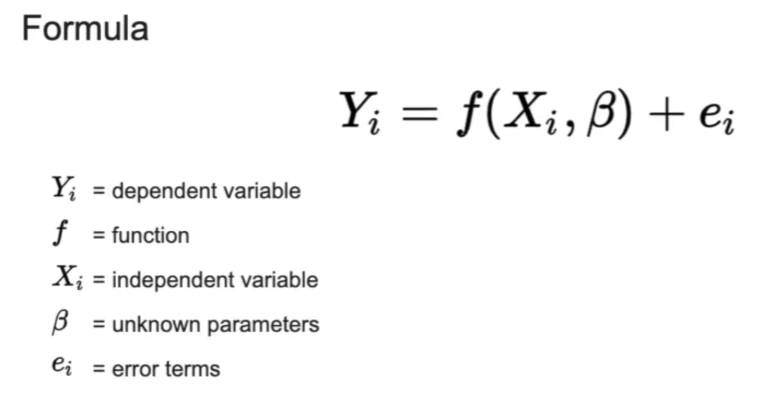

In [44]:
# Create *know* parameters

weight = 0.8
bias = 0.4

# Create

start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1) # Input
y = weight * X + bias  # Output

print(f"Tensor:\n{X[:10]}\nDependent varable:\n{y[:10]}\nX len:{len(X)} Y len: {len(y)}")

Tensor:
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
Dependent varable:
tensor([[0.4000],
        [0.4080],
        [0.4160],
        [0.4240],
        [0.4320],
        [0.4400],
        [0.4480],
        [0.4560],
        [0.4640],
        [0.4720]])
X len:100 Y len: 100


### Splitting data into training and test sets


In [45]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"X_train: {len(X_train)} Y_train: {len(y_train)}\nX_test: {len(X_test)} y_test: {len(y_test)}")

X_train: 80 Y_train: 80
X_test: 20 y_test: 20


### Data visualization

In [46]:
def plot_pred(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
   
  plt.figure(figsize=(10, 10))
  # train
  plt.scatter(train_data, train_labels, c="blue", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="red", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

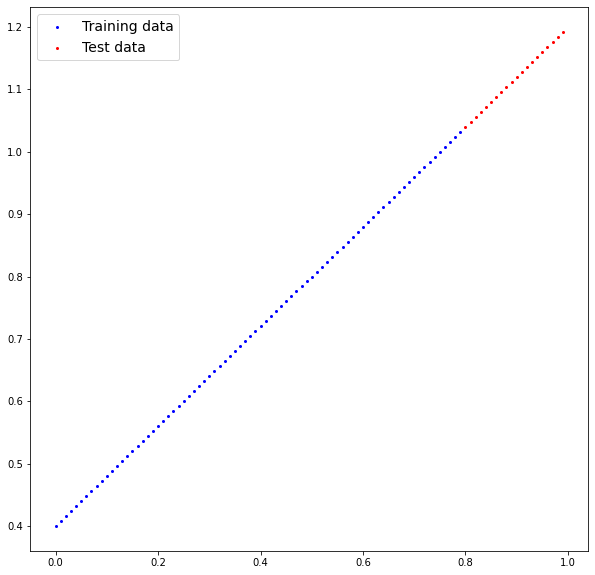

In [47]:
plot_pred()

## 2. Build ML model


In [48]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  # nn.Module => contains all the building blocks fot neural network
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) 
    # require_grad <= can this parameter be ypdated via gradient descent?
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define computation in the model

  def forward(self, x: torch.Tensor) -> torch.tensor:
    return self.weights * x + self.bias # Linear regression

**🟦EN**: What our model does:
1. Start with random values (weight & bias)
2. Look at training data and adjust the random values to better represent (ot get closer to) the ideal values (the weight and bias values we used to) 

**🟥ES**: Que hace el modelo?
1. Empieza con valores aleatorios (weight y bias)
2. Mira en los datos de entrenamiento y ajusta los valores aleatorios para una mejor representación, y encontrar los valores ideales.

### PyTorch model building essentials

**🟦EN**:
* **torch.nn** => Contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* **torch.nn.Parameter** => wgat parameters should our model try and learn, ofter a PyTorch layer from torch.nn will set these for us.
* **torch.optim** => This where the optimizers in PyTorch live, they will help with gradient descent.
* **torch.nn.Module** => The base class for all neural network modules, if you a subclass it, you should overwrite forward()
* **def forward()** => All nn.Module subclasses require you yo overwrite forward(), this method defines what happens in the forward computation.
**🟥ES**:
* **torch.nn** => Contiene todos los edificios para grafos computacionales (una red neuronal puede considerarse un grafo computacional)
* **torch.nn.Parameter** => Qué parámetros debe intentar aprender nuestro modelo, a menudo una capa PyTorch de torch.nn los establecerá por nosotros.
* **torch.optim** => Aquí es donde viven los optimizadores en PyTorch, que ayudarán con el descenso de gradiente.
* **torch.nn.Module** => La clase base para todos los módulos de redes neuronales, si la subclase, debe sobrescribir forward()
* **def forward()** => Todas las subclases de nn.Module requieren que se sobrescriba forward(), este método define lo que ocurre en el cálculo forward.


### Checking the contents of out pytorch model

**🟦EN**: No we've created a model, let's see what's inside

So we can check our model parameters or whet's inside our model using `.parameters()`

**🟥ES**: No hemos creado un modelo, vamos a ver lo que hay dentro

Así que podemos comprobar los parámetros de nuestro modelo o lo que hay dentro de nuestro modelo usando `.parameters()`.

In [49]:
# Create a random seed
torch.manual_seed(10)

# Create model instance
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([-0.6014], requires_grad=True), Parameter containing:
 tensor([-1.0122], requires_grad=True)]

In [50]:
model.state_dict()

OrderedDict([('weights', tensor([-0.6014])), ('bias', tensor([-1.0122]))])

### Making predictions using `torch.inference_mode()`

**🟦EN**: To check our model's predictive power, let's see how well is predicts `y_tests` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method

**🟥ES**: Para comprobar el poder predictivo de nuestro modelo, veamos cómo predice `y_pruebas` basándose en `X_prueba`s.

Cuando pasamos los datos a través de nuestro modelo, se va a ejecutar a través del método `forward()`

In [51]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[-1.4933],
        [-1.4993],
        [-1.5054],
        [-1.5114],
        [-1.5174],
        [-1.5234],
        [-1.5294],
        [-1.5354],
        [-1.5414],
        [-1.5474],
        [-1.5535],
        [-1.5595],
        [-1.5655],
        [-1.5715],
        [-1.5775],
        [-1.5835],
        [-1.5895],
        [-1.5956],
        [-1.6016],
        [-1.6076]])

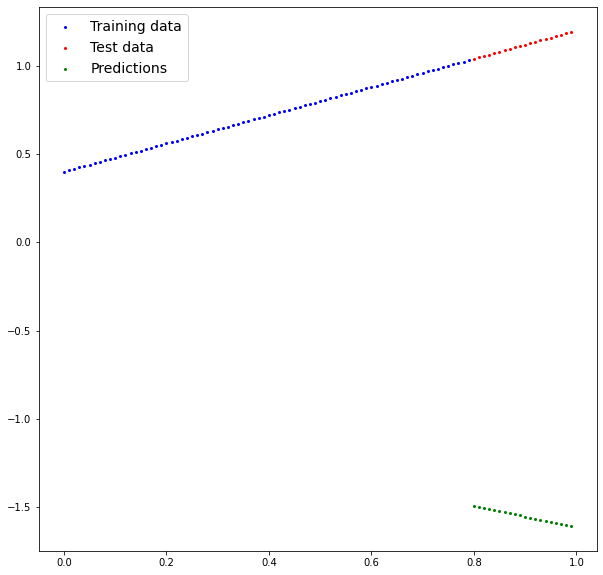

In [52]:
plot_pred(predictions=y_preds)

## 3. Train Model

**🟦EN**: The whole idea of training is for a model to move form some *unknown* parameters (these mat be random) to some *know* parameters.

Or in other words from a poor representation of the data to a better representation of the data. 

One way to measure how poor or how wrong your models predictiosn are is to use a loss function. 

*Loss functions* can be called cost functions or criterios functions to. 

**Loss function** is a function to measure how wrong your model's predictions are to the ideal outputs. 

**Optimizer**: Takes into account the loss of a model and adjust the model's parametes (e.g. weight and bias) to imporove loss functions

And specifically for PyTorch, we need:
* A training loop
* A testing loop

**🟥ES**: La idea del entrenamiento es que un modelo pase de unos parámetros *desconocidos* (que pueden ser aleatorios) a unos parámetros *conocidos*.

O, en otras palabras, de una mala representación de los datos a una mejor representación de los datos.

Una ade las manera de medir cuando de pobre o si estan equivocadas las predicciónes de tu modelo es usando las loss functions. 

*Las funciones de pérdida pueden denominarse funciones de coste o funciones de criterio. 

**Loss function** es una función para medir lo erróneas que son las predicciones de su modelo con respecto a los resultados ideales.

**Optimizador**: Tiene en cuenta la pérdida de un modelo y ajusta los parámetros del modelo (por ejemplo, el peso y el sesgo) para mejorar el resultado de loss function

Especificamente para PyTorch necesitamso:
* Un loop de entrenamiento
* Un loop de test

[torch.optim](https://pytorch.org/docs/stable/optim.html)


In [53]:
list(model.parameters())

[Parameter containing:
 tensor([-0.6014], requires_grad=True), Parameter containing:
 tensor([-1.0122], requires_grad=True)]

In [54]:
# Setup a loss function
loss_f = nn.L1Loss()

# Setup optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01) 

## Building a training / test loop in PyTorch

**🟦EN**: Training loop needs:
1. Loop through the data
2. Forward pass (this involves data movin throught our model's `forward()` functions) to make predictions on data - also called forward propagation
3. Calculate the loss (compare forwoard pass predictions to grond thruth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through **BACKPROPAGATION**
6. Optimizer step - use the optimizers to adjust our model's parameter to try and improve the loss. **GRADIENT DESCENT**

**🟥ES**: Necesidades del bucle de formación:
1. Bucle a través de los datos
2. Pasar hacia delante (esto implica que los datos se muevan a través de las funciones `forward()` de nuestro modelo) para hacer predicciones sobre los datos - también llamado propagación hacia delante.
3. 3. Calcular la pérdida (comparar las predicciones del paso anterior con las etiquetas verdaderas)
4. Optimizador cero grad
5. Pérdida hacia atrás - retroceder mediante **PROPAGACIÓN HACIA ATRÁS**.
6. Optimizador paso - utilizar los optimizadores para ajustar el parámetro de nuestro modelo para tratar de mejorar la pérdida. **DESCENSO GRADIENTE**

In [55]:
list(model.eval().parameters())

[Parameter containing:
 tensor([-0.6014], requires_grad=True), Parameter containing:
 tensor([-1.0122], requires_grad=True)]

In [58]:
epochs = 100

# Loop the data

for epoch in range(epochs):
  # Set the model to training mode
  model.train() # Train mode in pytorch
  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate the loss
  loss = loss_f(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Set the optimizer (perform gradient descent)
  optimizer.step()
  # model.eval()


**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**: